import numpy as np


1.	The image pairs do not give proper cross-correlation results or velocity vectors and only some of the cases work with a very narrow range of parameters. 

It seems that 1/20 data works. Please see the slide on page. XX.

2.	Neither openPIV nor PIVlab is able to resolve the problem. 

3.	When the min/max limits of the velocities are used to choose an acceptable range of velocities, the results are all over the place and there is no one cluster where the bulk of the results are there and the rest being outliers. That makes it really hard to distinguish between correct and incorrect vectors. 

4.	The groups that give a BL-like result give a velocity magnitude of about 1/4-1/3 of the number read from the flowmeter and unless there is something missing about the scale factor, this makes the results questionable. Were these results coincidentally BL-like? or is there something else in the experiment that could have made it possible for the velocity to become lower?

** check with 500 us.

5.	From what it seems there are enough particles suspended in the water to give readable images, but the observation that we need larger windows to make it work makes me think whether the timing between the two pulses is too far away that we lose the particle pairs between the two images? Or is there too much 3D motion that the particles go in the out-of-plane direction (up-down motion)? 



6.	Identifying and removing the edge of the wall or not doing that does not help or hurt the PIV algorithms. Either way, it is not possible to get meaningful results. 



7.	The sensor array used is very slim in the streamwise direction. That allows for only 3-4 rows of data in that direction. Our main source of particle loss is most likely to be in the streamwise direction, so even increasing the search area won't be helpful if there is no information within the search window. 



In [72]:
import numpy as np
from matplotlib import pyplot as plt

import openpiv_recipes
import os
import importlib
importlib.reload(openpiv_recipes)

<module 'openpiv_recipes' from 'C:\\Users\\yj\\Documents\\GitHub\\piv_recipes\\openpiv_recipes.py'>

In [76]:
folder_path = 'D:/ROWLAND/piv-data/2021-01-19'
pi = openpiv_recipes.ParticleImage(folder_path)
print(pi.param_dict_list)

[{'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 0.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET0_01-18_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 0.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET0_ag2_laser10'}, {'sample': 'test2_Flat_10', 'test': 2.0, 'motor': 5.0, 'pos': 1.0, 'VOFFSET': 0.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_test2_Flat_10_motor5.00_pos1_VOFFSET0_ag2_laser10'}, {'sample': 'test_Flat_10', 'motor': 5.0, 'pos': 1.0, 'VOFFSET': 0.0, 'ag': 2.0, 'laser': 10.0, 'path': 'test_Flat_10_motor5.00_pos1_VOFFSET0_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 80.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET80_01-18_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 80.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET80_ag2_laser10'}, {'sample': 'test2_Flat_10', 'test': 2.0, '

In [78]:
list_flat = [x for x in pi.param_dict_list if x['sample'] == 'Flat_10' and x['motor'] == 25.0]
list_1_1_1 = [x for x in pi.param_dict_list if x['sample'] == '1_1_1_10' and x['motor'] == 25.0]

In [79]:
print(list_1_1_1)

[{'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 0.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET0_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 80.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET80_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 160.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET160_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 240.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET240_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 320.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET320_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 400.0, 'ag': 2.0, 'laser': 10.0, 'path': 'img_1_1_1_10_motor25.00_pos1_VOFFSET400_ag2_laser10'}, {'sample': '1_1_1_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSE

In [64]:
pi.param_dict_list = list_flat
print(pi.param_dict_list)

[{'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 0.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET0_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 80.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET80_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 160.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET160_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 240.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET240_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 320.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET320_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET': 400.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos1_VOFFSET400_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 1.0, 'VOFFSET

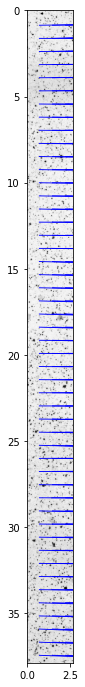

Std of u3: 12.896
Mean of u3: 793.153


In [48]:
pi.quick_piv(1,6)

In [49]:
camera_position = 1
sensor_position = 2

location_path = [x['path'] for x in pi.param_dict_list if x['pos'] == camera_position and x['VOFFSET'] == (sensor_position-1)*80]


In [50]:
location_path

['Flat_10_motor25.00_pos1_VOFFSET80_01-18_ag2_laser10']

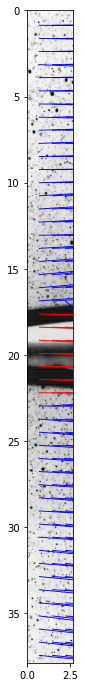

Std of u3: 37.965
Mean of u3: 816.779


In [87]:
pi.param_dict_list = list_1_1_1
#print(pi.param_dict_list)

pi.quick_piv(2,4)

In [105]:
folder_path = 'D:/ROWLAND/piv-data/2021-01-18'
pi2 = openpiv_recipes.ParticleImage(folder_path)
print(pi2.param_dict_list)

[{'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 0.0, 'path': 'Flat_10_motor18_pos1_VOFFSET0_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 80.0, 'path': 'Flat_10_motor18_pos1_VOFFSET80_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 160.0, 'path': 'Flat_10_motor18_pos1_VOFFSET160_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 240.0, 'path': 'Flat_10_motor18_pos1_VOFFSET240_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 320.0, 'path': 'Flat_10_motor18_pos1_VOFFSET320_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 400.0, 'path': 'Flat_10_motor18_pos1_VOFFSET400_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 480.0, 'path': 'Flat_10_motor18_pos1_VOFFSET480_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 560.0, 'path': 'Flat_10_motor18_pos1_VOFFSET560_01-18'}, {'sample': 'Flat_10', 'motor': 18.0, 'pos': 1.0, 'VOFFSET': 640.0, 'p

In [106]:
list2_original = pi2.param_dict_list
list2_flat = [x for x in pi2.param_dict_list if x['sample'] == 'Flat_10' and x['motor'] == 25.0]
pi2.param_dict_list = list2_flat
print(list2_flat)

[{'sample': 'Flat_10', 'motor': 25.0, 'pos': 2.0, 'VOFFSET': 0.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos2_VOFFSET0_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 2.0, 'VOFFSET': 80.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos2_VOFFSET80_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 2.0, 'VOFFSET': 160.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos2_VOFFSET160_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 2.0, 'VOFFSET': 240.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos2_VOFFSET240_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 2.0, 'VOFFSET': 320.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos2_VOFFSET320_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 2.0, 'VOFFSET': 400.0, 'ag': 2.0, 'laser': 10.0, 'path': 'Flat_10_motor25.00_pos2_VOFFSET400_01-18_ag2_laser10'}, {'sample': 'Flat_10', 'motor': 25.0, 'pos': 2.0, 'VOFFSET

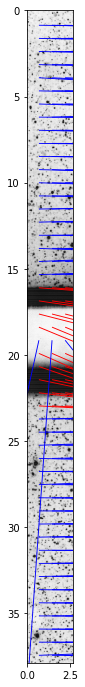

Std of u3: 166.243
Mean of u3: 766.777


In [110]:
pi2.quick_piv(5,1)